<h1 style='color:Blue' align='center'> House Loan Data Analysis </h4>

#### Load the dataset

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
df = pd.read_csv("loan_data.csv")

In [94]:
df.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [95]:
df.shape

(307511, 122)

In [96]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

#### Print percentage of default to payer of the dataset for the TARGET column

In [97]:
df['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

Text(0.5, 1.0, 'Target Balance')

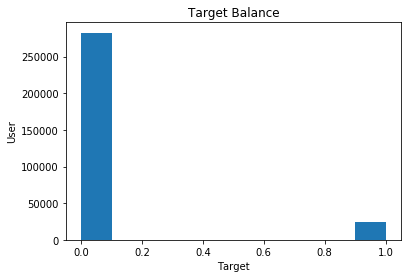

In [98]:
plt.hist(df['TARGET'])
plt.xlabel("Target")
plt.ylabel("User")
plt.title("Target Balance")

In [99]:
for i in df:
    if df[i].dtype is not object:
        print(f'{i} : {df[i].unique()}')
    else:
        print('not an object')
        

SK_ID_CURR : [100002 100003 100004 ... 456253 456254 456255]
TARGET : [1 0]
NAME_CONTRACT_TYPE : ['Cash loans' 'Revolving loans']
CODE_GENDER : ['M' 'F' 'XNA']
FLAG_OWN_CAR : ['N' 'Y']
FLAG_OWN_REALTY : ['Y' 'N']
CNT_CHILDREN : [ 0  1  2  3  4  7  5  6  8  9 11 12 10 19 14]
AMT_INCOME_TOTAL : [202500.  270000.   67500.  ...  96768.  546250.5 113062.5]
AMT_CREDIT : [ 406597.5 1293502.5  135000.  ...  181989.   743863.5 1391130. ]
AMT_ANNUITY : [24700.5 35698.5  6750.  ... 71986.5 58770.  77809.5]
AMT_GOODS_PRICE : [ 351000.  1129500.   135000.  ...  453465.   143977.5  743863.5]
NAME_TYPE_SUITE : ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']
NAME_INCOME_TYPE : ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
NAME_EDUCATION_TYPE : ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
NAME_FAMILY_STATUS : ['Singl

LANDAREA_AVG : [0.0369 0.013     nan ... 0.4394 0.2662 0.313 ]
LIVINGAPARTMENTS_AVG : [0.0202 0.0773    nan ... 0.2334 0.0111 0.1543]
LIVINGAREA_AVG : [0.019  0.0549    nan ... 0.4256 0.6005 0.9279]
NONLIVINGAPARTMENTS_AVG : [0.000e+00 3.900e-03       nan 1.930e-02 7.700e-03 1.900e-03 6.560e-02
 5.800e-03 2.780e-01 2.320e-02 7.720e-02 1.931e-01 3.860e-02 1.540e-02
 2.201e-01 1.160e-02 2.700e-02 1.622e-01 3.090e-02 4.250e-02 6.180e-02
 5.020e-02 1.740e-02 2.900e-02 2.100e-03 1.300e-03 6.900e-03 1.350e-02
 4.100e-03 1.500e-03 1.274e-01 5.790e-02 2.625e-01 8.000e-04 1.969e-01
 4.830e-02 4.630e-02 4.440e-02 1.030e-02 5.660e-02 2.830e-02 1.158e-01
 3.470e-02 8.110e-02 7.340e-02 7.452e-01 1.236e-01 2.500e-03 1.506e-01
 1.000e+00 6.400e-03 9.270e-02 4.890e-02 1.100e-03 1.429e-01 8.690e-02
 1.400e-03 5.410e-02 2.080e-02 1.410e-02 2.278e-01 7.000e-04 1.000e-03
 6.950e-02 2.200e-03 8.880e-02 2.220e-02 2.900e-03 1.000e-02 1.197e-01
 1.029e-01 9.700e-03 2.046e-01 1.081e-01 1.390e-01 2.317e-01 2.70

NONLIVINGAREA_MODE : [0.        nan 0.106  ... 0.4629 0.3048 0.4109]
APARTMENTS_MEDI : [0.025  0.0968    nan ... 0.9993 0.6527 0.3024]
BASEMENTAREA_MEDI : [0.0369 0.0529    nan ... 0.3482 0.274  0.2733]
YEARS_BEGINEXPLUATATION_MEDI : [0.9722 0.9851    nan 0.9811 0.9806 0.9985 0.9881 0.9781 0.9786 0.9876
 0.9861 0.9732 0.9831 0.9697 0.9901 0.9801 0.9762 0.996  0.998  0.9846
 0.9886 0.9136 0.9841 0.9856 0.9955 0.9677 0.9891 0.9752 0.9826 0.9727
 0.9578 0.9742 0.9707 0.9975 0.999  0.9816 0.9866 0.9836 0.994  0.9757
 0.9737 0.9791 0.9821 0.9682 0.9945 0.9771 0.9747 0.9776 0.9796 0.9896
 0.9692 0.9518 0.995  0.9995 0.9414 0.993  0.9702 0.9921 0.9916 0.9712
 0.4933 0.9871 0.9672 0.9911 0.9608 0.9906 0.9503 0.9598 0.997  0.9583
 0.9767 0.929  0.9935 0.9617 0.9563 0.9965 0.9925 0.9508 0.9717 0.9687
 0.9667 0.9359 0.9573 0.9588 0.9513 0.9642 0.9553 0.9603 0.9622 0.9637
 0.     0.9568 0.9652 0.9523 0.4953 0.9473 0.9071 0.9593 0.9627 0.9613
 0.9439 0.9434 0.9488 0.4973 0.9459 0.9334 0.9657 0.9632

AMT_REQ_CREDIT_BUREAU_QRT : [  0.  nan   1.   2.   4.   3.   8.   5.   6.   7. 261.  19.]
AMT_REQ_CREDIT_BUREAU_YEAR : [ 1.  0. nan  2.  4.  5.  3.  8.  6.  9.  7. 10. 11. 13. 16. 12. 25. 23.
 15. 14. 22. 17. 19. 18. 21. 20.]


#### Check for null values in the dataset and fill them

In [100]:
df=df.ffill()

In [101]:
label_cols = ['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE','NAME_INCOME_TYPE',
              'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START',
              'ORGANIZATION_TYPE','FONDKAPREMONT_MODE','HOUSETYPE_MODE','WALLSMATERIAL_MODE','EMERGENCYSTATE_MODE']

In [102]:
from sklearn.preprocessing import LabelEncoder

In [103]:
df[label_cols]=df[label_cols].apply(LabelEncoder().fit_transform)

In [104]:
for i in df:
    if df[i].dtype is not object:
        print(f'{i} : {df[i].unique()}')
    else:
        print('not an object')

SK_ID_CURR : [100002 100003 100004 ... 456253 456254 456255]
TARGET : [1 0]
NAME_CONTRACT_TYPE : [0 1]
CODE_GENDER : [1 0 2]
FLAG_OWN_CAR : [0 1]
FLAG_OWN_REALTY : [1 0]
CNT_CHILDREN : [ 0  1  2  3  4  7  5  6  8  9 11 12 10 19 14]
AMT_INCOME_TOTAL : [202500.  270000.   67500.  ...  96768.  546250.5 113062.5]
AMT_CREDIT : [ 406597.5 1293502.5  135000.  ...  181989.   743863.5 1391130. ]
AMT_ANNUITY : [24700.5 35698.5  6750.  ... 71986.5 58770.  77809.5]
AMT_GOODS_PRICE : [ 351000.  1129500.   135000.  ...  453465.   143977.5  743863.5]
NAME_TYPE_SUITE : [6 1 5 0 3 4 2]
NAME_INCOME_TYPE : [7 4 1 3 6 5 0 2]
NAME_EDUCATION_TYPE : [4 1 2 3 0]
NAME_FAMILY_STATUS : [3 1 0 5 2 4]
NAME_HOUSING_TYPE : [1 4 5 2 3 0]
REGION_POPULATION_RELATIVE : [0.018801 0.003541 0.010032 0.008019 0.028663 0.035792 0.003122 0.018634
 0.019689 0.0228   0.015221 0.031329 0.016612 0.010006 0.020713 0.010966
 0.04622  0.025164 0.006296 0.026392 0.018029 0.019101 0.030755 0.008575
 0.01885  0.006207 0.009175 0.007305

LIVINGAPARTMENTS_AVG : [0.0202 0.0773 0.1202 ... 0.2334 0.0111 0.1543]
LIVINGAREA_AVG : [0.019  0.0549 0.0778 ... 0.4256 0.6005 0.9279]
NONLIVINGAPARTMENTS_AVG : [0.000e+00 3.900e-03 1.930e-02 7.700e-03 1.900e-03 6.560e-02 5.800e-03
 2.780e-01 2.320e-02 7.720e-02 1.931e-01 3.860e-02 1.540e-02 2.201e-01
 1.160e-02 2.700e-02 1.622e-01 3.090e-02 4.250e-02 6.180e-02 5.020e-02
 1.740e-02 2.900e-02 2.100e-03 1.300e-03 6.900e-03 1.350e-02 4.100e-03
 1.500e-03 1.274e-01 5.790e-02 2.625e-01 8.000e-04 1.969e-01 4.830e-02
 4.630e-02 4.440e-02 1.030e-02 5.660e-02 2.830e-02 1.158e-01 3.470e-02
 8.110e-02 7.340e-02 7.452e-01 1.236e-01 2.500e-03 1.506e-01 1.000e+00
 6.400e-03 9.270e-02 4.890e-02 1.100e-03 1.429e-01 8.690e-02 1.400e-03
 5.410e-02 2.080e-02 1.410e-02 2.278e-01 7.000e-04 1.000e-03 6.950e-02
 2.200e-03 8.880e-02 2.220e-02 2.900e-03 1.000e-02 1.197e-01 1.029e-01
 9.700e-03 2.046e-01 1.081e-01 1.390e-01 2.317e-01 2.700e-03 3.822e-01
 3.000e-04 8.490e-02 5.100e-03 1.610e-02 2.857e-01 1.313e

BASEMENTAREA_MEDI : [0.0369 0.0529 0.0973 ... 0.3482 0.274  0.2733]
YEARS_BEGINEXPLUATATION_MEDI : [0.9722 0.9851 0.9811 0.9806 0.9985 0.9881 0.9781 0.9786 0.9876 0.9861
 0.9732 0.9831 0.9697 0.9901 0.9801 0.9762 0.996  0.998  0.9846 0.9886
 0.9136 0.9841 0.9856 0.9955 0.9677 0.9891 0.9752 0.9826 0.9727 0.9578
 0.9742 0.9707 0.9975 0.999  0.9816 0.9866 0.9836 0.994  0.9757 0.9737
 0.9791 0.9821 0.9682 0.9945 0.9771 0.9747 0.9776 0.9796 0.9896 0.9692
 0.9518 0.995  0.9995 0.9414 0.993  0.9702 0.9921 0.9916 0.9712 0.4933
 0.9871 0.9672 0.9911 0.9608 0.9906 0.9503 0.9598 0.997  0.9583 0.9767
 0.929  0.9935 0.9617 0.9563 0.9965 0.9925 0.9508 0.9717 0.9687 0.9667
 0.9359 0.9573 0.9588 0.9513 0.9642 0.9553 0.9603 0.9622 0.9637 0.
 0.9568 0.9652 0.9523 0.4953 0.9473 0.9071 0.9593 0.9627 0.9613 0.9439
 0.9434 0.9488 0.4973 0.9459 0.9334 0.9657 0.9632 0.9424 0.9548 0.9449
 0.4913 0.9647 0.9662 0.9468 0.9001 0.9324 0.9389 1.     0.9493 0.9463
 0.9498 0.92   0.4903 0.9121 0.9444 0.9409 0.9384 0.4

In [105]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

#### Encode the columns that is required for the model

In [106]:
df1 = df[['SK_ID_CURR','NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_CHILDREN',
         'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','NAME_TYPE_SUITE','NAME_INCOME_TYPE',
         'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','REGION_POPULATION_RELATIVE','OWN_CAR_AGE',
         'FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','OCCUPATION_TYPE',
         'CNT_FAM_MEMBERS','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','WEEKDAY_APPR_PROCESS_START',
         'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION',
         'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','ORGANIZATION_TYPE','EXT_SOURCE_1',
         'APARTMENTS_AVG','BASEMENTAREA_AVG','YEARS_BUILD_AVG','FONDKAPREMONT_MODE','HOUSETYPE_MODE','TOTALAREA_MODE',
         'WALLSMATERIAL_MODE','EMERGENCYSTATE_MODE','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE',
         'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE','AMT_REQ_CREDIT_BUREAU_WEEK',
         'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR','TARGET']]
df1.set_index('SK_ID_CURR',inplace=True)
df1.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,0,1,0,1,0,202500.0,406597.5,24700.5,351000.0,6,...,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,1.0,1
100003,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,1,...,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0
100004,1,1,1,1,0,67500.0,135000.0,6750.0,135000.0,6,...,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0
100006,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,6,...,2.0,0.0,2.0,0.0,-617.0,0.0,0.0,0.0,0.0,0
100007,0,1,0,1,0,121500.0,513000.0,21865.5,513000.0,6,...,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0


In [107]:
df1.shape

(307511, 54)

In [108]:
df1 = df1.dropna()

In [109]:
df1.shape

(307509, 54)

Text(0.5, 1.0, 'Target Balance')

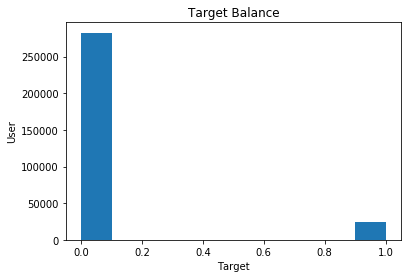

In [110]:
plt.hist(df1['TARGET'])
plt.xlabel("Target")
plt.ylabel("User")
plt.title("Target Balance")

In [111]:
for i in df1:
    print(f'{i} : {df1[i].unique()}')

NAME_CONTRACT_TYPE : [1 0]
CODE_GENDER : [1 0 2]
FLAG_OWN_CAR : [1 0]
FLAG_OWN_REALTY : [1 0]
CNT_CHILDREN : [ 0  1  2  3  4  7  5  6  8  9 11 12 10 19 14]
AMT_INCOME_TOTAL : [ 67500.  135000.  121500.  ...  96768.  546250.5 113062.5]
AMT_CREDIT : [ 135000.   312682.5  513000.  ...  181989.   743863.5 1391130. ]
AMT_ANNUITY : [ 6750.  29686.5 21865.5 ... 71986.5 58770.  77809.5]
AMT_GOODS_PRICE : [135000.  297000.  513000.  ... 453465.  143977.5 743863.5]
NAME_TYPE_SUITE : [6 5 0 1 3 4 2]
NAME_INCOME_TYPE : [7 4 1 3 6 5 0 2]
NAME_EDUCATION_TYPE : [4 1 2 3 0]
NAME_FAMILY_STATUS : [3 0 1 5 2 4]
NAME_HOUSING_TYPE : [1 4 5 2 3 0]
REGION_POPULATION_RELATIVE : [0.010032 0.008019 0.028663 0.035792 0.003122 0.018634 0.019689 0.0228
 0.015221 0.031329 0.016612 0.010006 0.020713 0.010966 0.04622  0.025164
 0.006296 0.026392 0.018029 0.019101 0.030755 0.008575 0.01885  0.006207
 0.009175 0.007305 0.007114 0.009334 0.022625 0.01452  0.006629 0.00733
 0.032561 0.018801 0.00496  0.072508 0.009657 0.

In [112]:
mms_cols = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']
df1[mms_cols].dtypes

AMT_INCOME_TOTAL    float64
AMT_CREDIT          float64
AMT_ANNUITY         float64
AMT_GOODS_PRICE     float64
dtype: object

In [113]:
df1["AMT_INCOME_TOTAL"].value_counts

<bound method IndexOpsMixin.value_counts of SK_ID_CURR
100004     67500.0
100006    135000.0
100007    121500.0
100008     99000.0
100009    171000.0
            ...   
456251    157500.0
456252     72000.0
456253    153000.0
456254    171000.0
456255    157500.0
Name: AMT_INCOME_TOTAL, Length: 307509, dtype: float64>

In [114]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

df1[mms_cols] = mms.fit_transform(df1[mms_cols])

In [115]:
df1[mms_cols].head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE
SK_ID_CURR,,,,
100004,0.000358,0.022472,0.020025,0.023569
100006,0.000935,0.066837,0.109477,0.063973
100007,0.000819,0.116854,0.078975,0.117845
100008,0.000627,0.111235,0.101018,0.103255
100009,0.001243,0.378458,0.154774,0.337823


In [116]:
df1.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100004,1,1,1,1,0,0.000358,0.022472,0.020025,0.023569,6,...,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0
100006,0,0,0,1,0,0.000935,0.066837,0.109477,0.063973,6,...,2.0,0.0,2.0,0.0,-617.0,0.0,0.0,0.0,0.0,0
100007,0,1,0,1,0,0.000819,0.116854,0.078975,0.117845,6,...,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0
100008,0,1,0,1,0,0.000627,0.111235,0.101018,0.103255,5,...,0.0,0.0,0.0,0.0,-2536.0,0.0,0.0,1.0,1.0,0
100009,0,0,1,1,1,0.001243,0.378458,0.154774,0.337823,6,...,1.0,0.0,1.0,0.0,-1562.0,0.0,1.0,1.0,2.0,0


In [117]:
df_train = df1.drop('TARGET',axis=1)
df_test = df1['TARGET']

In [118]:
df_test.value_counts()

0    282685
1     24824
Name: TARGET, dtype: int64

#### Balance the dataset if the data is imbalanced

In [119]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy = 'minority')
x, y = smote.fit_sample(df_train,df_test)


#### Plot the balanced data or imbalanced data

Text(0.5, 1.0, 'Target Balance')

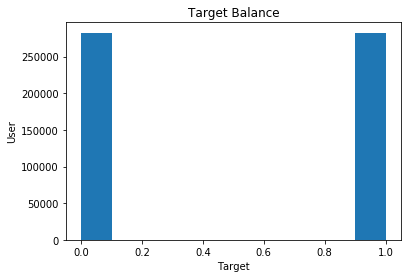

In [120]:
plt.hist(y)
plt.xlabel("Target")
plt.ylabel("User")
plt.title("Target Balance")

In [121]:
y.value_counts()

1    282685
0    282685
Name: TARGET, dtype: int64

In [122]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report, confusion_matrix

In [123]:
from sklearn.model_selection import train_test_split
ztrain,ztest,ytrain,ytest = train_test_split(x, y)
print("\nShape of train test split\n")

print(ztrain.shape)
print(ztest.shape)
print(ytrain.shape)
print(ytest.shape)




Shape of train test split

(424027, 53)
(141343, 53)
(424027,)
(141343,)


In [124]:
ytrain.isnull().sum()

0

### Machine Learning Algorithm : LightGBM

In [125]:
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [126]:
import random, os
SEED = 2021

random.seed(SEED)
np.random.seed(SEED)
os.environ['PYTHONHASHSEED']=str(SEED)



In [127]:
lgbm_features_index = [i for i,col in enumerate(ztrain.columns)]
print(lgbm_features_index)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52]


In [128]:
NUM_OF_BOOST_ROUND = 10000
EARLY_STOPPING = 300

params = {
    'cat_features' : lgbm_features_index,
    'metric': 'auc',
    'seed': SEED,
    'n_estimators': NUM_OF_BOOST_ROUND
}

In [129]:
bst = LGBMClassifier(**params, early_stopping_rounds=EARLY_STOPPING)

In [130]:
bst.fit(ztrain, ytrain,  eval_set=(ztest, ytest), early_stopping_rounds=100, verbose=-1)

Training until validation scores don't improve for 300 rounds
Early stopping, best iteration is:
[766]	valid_0's auc: 0.972014


LGBMClassifier(cat_features=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                             15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
                             28, 29, ...],
               early_stopping_rounds=300, metric='auc', n_estimators=10000,
               seed=2021)

In [131]:
ypred_lgb = bst.predict_proba(ztest)[:,1]

In [137]:
ypred_lgb = ypred_lgb.flatten()
ypred_lgb = np.round(ypred_lgb)

In [138]:
ypred_lgb

array([0., 0., 0., ..., 0., 0., 1.])

In [139]:
print("Classification Report: \n", classification_report(ytest, ypred_lgb))

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     70571
           1       1.00      0.91      0.95     70772

    accuracy                           0.96    141343
   macro avg       0.96      0.96      0.95    141343
weighted avg       0.96      0.96      0.95    141343



#### Calculate Sensitivity as a metrice

In [140]:
from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(ytest, ypred_lgb)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Confusion Matrix : 
 [[70520    51]
 [ 6304 64468]]
Accuracy :  0.9550384525586694
Sensitivity :  0.9992773235464992
Specificity :  0.9109252246651218


#### Calculate area under receiver operating characteristics curve

In [143]:
probs = bst.predict_proba(ztest)
preds = probs[:,1]

preds

array([0.02568974, 0.04633543, 0.052057  , ..., 0.03797886, 0.09340328,
       0.999994  ])

In [144]:
fpr, tpr, threshold = metrics.roc_curve(ytest, preds)
roc_auc = metrics.auc(fpr, tpr)

roc_auc

0.9720135521879277

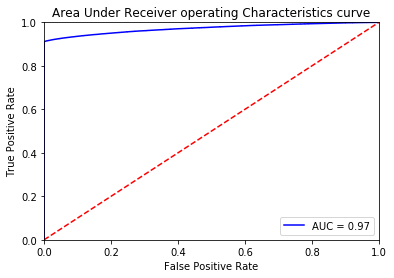

In [145]:
plt.title('Area Under Receiver operating Characteristics curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Deep learning algorithm : ANN

In [36]:
print('\n Neural network starts\n')

ann_regular = keras.Sequential([
keras.layers.Dense(53, input_shape=(53,),activation='relu'),
keras.layers.Dense(25,activation='relu'),
keras.layers.Dense(1,activation='sigmoid')
])

ann_regular.compile(optimizer='adam',
loss='binary_crossentropy',
metrics=['accuracy'])

ann_regular.fit(ztrain,ytrain,epochs=50)


 Neural network starts

Epoch 1/50
13251/13251 [==============================] - 20s 1ms/step - loss: 0.7614 - accuracy: 0.6773
Epoch 2/50
13251/13251 [==============================] - 17s 1ms/step - loss: 0.5562 - accuracy: 0.7395
Epoch 3/50
13251/13251 [==============================] - 18s 1ms/step - loss: 0.5118 - accuracy: 0.7542
Epoch 4/50
13251/13251 [==============================] - 18s 1ms/step - loss: 0.4959 - accuracy: 0.7613
Epoch 5/50
13251/13251 [==============================] - 17s 1ms/step - loss: 0.4841 - accuracy: 0.7701
Epoch 6/50
13251/13251 [==============================] - 18s 1ms/step - loss: 0.4735 - accuracy: 0.7760
Epoch 7/50
13251/13251 [==============================] - 17s 1ms/step - loss: 0.4673 - accuracy: 0.7793
Epoch 8/50
13251/13251 [==============================] - 17s 1ms/step - loss: 0.4583 - accuracy: 0.7848
Epoch 9/50
13251/13251 [==============================] - 17s 1ms/step - loss: 0.4535 - accuracy: 0.7883
Epoch 10/50
13251/13251 [=====

In [37]:
ann_regular.evaluate(ztest,ytest)

4417/4417 [==============================] - 4s 923us/step - loss: 0.3404 - accuracy: 0.8496


[0.34038540720939636, 0.8495998978614807]

In [38]:
y_pred = ann_regular.predict(ztest)
y_pred = np.round(y_pred)

#### Calculate Sensitivity as a metrice

In [39]:
print("Classification Report: \n", classification_report(ytest, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.96      0.86     70705
           1       0.94      0.74      0.83     70638

    accuracy                           0.85    141343
   macro avg       0.87      0.85      0.85    141343
weighted avg       0.87      0.85      0.85    141343



In [61]:
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [68]:
from sklearn.metrics import confusion_matrix

In [69]:
cm1 = confusion_matrix(ytest, y_pred)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Confusion Matrix : 
 [[67600  3105]
 [18153 52485]]
Accuracy :  0.8495999094401562
Sensitivity :  0.9560851424934588
Specificity :  0.743013675358872


#### Calculate area under receiver operating characteristics curve

In [62]:
probs = ann_regular.predict_proba(ztest)
preds = probs[::1]

In [63]:
preds

array([[0.9999947 ],
       [0.9043759 ],
       [0.08859581],
       ...,
       [0.987818  ],
       [0.99661875],
       [0.06320655]], dtype=float32)

In [64]:
fpr, tpr, threshold = metrics.roc_curve(ytest, preds)
roc_auc = metrics.auc(fpr, tpr)

In [65]:
roc_auc

0.9280006008417578

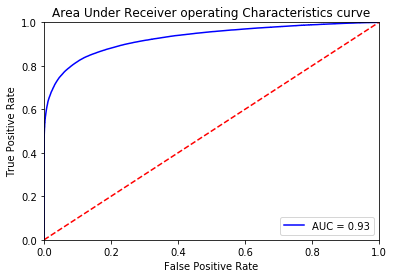

In [66]:
plt.title('Area Under Receiver operating Characteristics curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()